In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv('yds_data.csv', index_col = 0)

In [84]:
df.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012.0,1.610613e+09,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012.0,1.610613e+09,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012.0,1.610613e+09,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012.0,1.610613e+09,NaN,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012.0,1.610613e+09,42.64,2.0,0.000,19.0000,20.0


In [85]:
df.shape

(10066, 27)

In [86]:
for col in df.columns:
  print(str(col) + " " + " " + str(df[col].nunique()))

match_event_id  570
location_x  390
location_y  320
remaining_min  12
power_of_shot  6
knockout_match  1
game_season  7
remaining_sec  60
distance_of_shot  63
is_goal  2
area_of_shot  6
shot_basics  7
range_of_shot  5
team_name  1
date_of_game  460
home/away  68
shot_id_number  9531
lat/lng  35
type_of_shot  57
type_of_combined_shot  5
match_id  460
team_id  1
remaining_min.1  249
power_of_shot.1  175
knockout_match.1  344
remaining_sec.1  314
distance_of_shot.1  254


From the first look, we can see that lots of variables can be removed since it contains only one unique value of un-necessary variables.

In [87]:
col_drop = ['team_name', 'team_id', 'knockout_match.1', 'power_of_shot.1', 'remaining_min.1', 'remaining_sec.1', 'distance_of_shot.1', 'match_event_id']
df.drop(col_drop, axis = 1, inplace = True)

In [88]:
df.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id
0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012.0
1,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012.0
2,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012.0
3,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012.0
4,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012.0


Some of the extra columns is also removed which does not fit for the data.


In [89]:
col_drop2 = ['area_of_shot', 'date_of_game', 'game_season', 'shot_basics', 'match_id', 'shot_id_number']
df.drop(col_drop2, axis = 1, inplace=True)

In [90]:
df.isnull().sum()

location_x                452
location_y                481
remaining_min             488
power_of_shot             475
knockout_match            515
remaining_sec             540
distance_of_shot          511
is_goal                  2066
range_of_shot             533
home/away                 507
lat/lng                   512
type_of_shot             5043
type_of_combined_shot    5024
dtype: int64

In [91]:
df.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
range_of_shot             object
home/away                 object
lat/lng                   object
type_of_shot              object
type_of_combined_shot     object
dtype: object

In [92]:
df['range_of_shot'].value_counts()

Less Than 8 ft.    3049
16-24 ft.          2781
8-16 ft.           1954
24+ ft.            1715
Back Court Shot      34
Name: range_of_shot, dtype: int64

# Taking care of null values

Replacing all the null values in float64 datatypes by mean.

In [93]:
columns = ['location_x', 'location_y', 'remaining_min', 'power_of_shot', 'knockout_match', 'remaining_sec', 'distance_of_shot']

for col in columns:
  df[col].fillna(df[col].mean(), inplace = True)

In [94]:
df.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
range_of_shot             object
home/away                 object
lat/lng                   object
type_of_shot              object
type_of_combined_shot     object
dtype: object

In [95]:
df['lat/lng'].value_counts().index[0]

'42.982923, -71.446094'

Latitude and Longitude are two separate entities. It has to be splitted accordingly.

In [96]:
df[['Lat','Long']] = df['lat/lng'].astype(str).str.split(',', expand=True).astype('float64')
df.drop('lat/lng', axis = 1, inplace=True)

In [97]:
df['type_of_combined_shot'].value_counts()

shot - 3    3783
shot - 4     955
shot - 1     252
shot - 5      34
shot - 2      18
Name: type_of_combined_shot, dtype: int64

Replacing 'type of combined shot' and 'type of shot' NaN varible to shot-NaN meaning no shot taken. 

In [98]:
columns = ['type_of_shot', 'type_of_combined_shot']

for col in columns:
  df[col].replace(np.NaN, "shot-NaN", inplace=True)

In [99]:
df.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,range_of_shot,home/away,type_of_shot,type_of_combined_shot,Lat,Long
0,167.0,72.0,10.000000,1.0,0.0,27.0,38.0,NaN,16-24 ft.,MANU @ POR,shot - 30,shot-NaN,45.539131,-122.651648
1,-157.0,0.0,10.000000,1.0,0.0,22.0,35.0,0.0,8-16 ft.,MANU @ POR,shot - 45,shot-NaN,45.539131,-122.651648
2,-101.0,135.0,7.000000,1.0,0.0,45.0,36.0,1.0,16-24 ft.,NaN,shot - 25,shot-NaN,45.539131,-122.651648
3,138.0,175.0,6.000000,1.0,0.0,52.0,42.0,0.0,16-24 ft.,MANU @ POR,shot-NaN,shot - 3,45.539131,-122.651648
4,0.0,0.0,4.966277,2.0,0.0,19.0,20.0,1.0,Less Than 8 ft.,MANU @ POR,shot-NaN,shot - 1,45.539131,-122.651648


In [100]:
df.isnull().sum()

location_x                  0
location_y                  0
remaining_min               0
power_of_shot               0
knockout_match              0
remaining_sec               0
distance_of_shot            0
is_goal                  2066
range_of_shot             533
home/away                 507
type_of_shot                0
type_of_combined_shot       0
Lat                       512
Long                      512
dtype: int64

Replacing lat and long by mean

In [101]:
columns = ['Lat', 'Long']

for col in columns:
  df[col].fillna(df[col].mean(), inplace = True)

In [102]:
df['range_of_shot'].value_counts()

Less Than 8 ft.    3049
16-24 ft.          2781
8-16 ft.           1954
24+ ft.            1715
Back Court Shot      34
Name: range_of_shot, dtype: int64

In [103]:
df[df['range_of_shot'].isnull()]

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,range_of_shot,home/away,type_of_shot,type_of_combined_shot,Lat,Long
17,-117.0,226.000000,8.0,2.0,0.0,50.0,45.000000,1.0,NaN,MANU vs. UTA,shot - 6,shot-NaN,42.982923,-71.446094
36,1.0,4.000000,4.0,1.0,0.0,9.0,20.000000,NaN,NaN,MANU @ VAN,shot-NaN,shot - 4,49.250068,-123.114646
37,-117.0,116.000000,5.0,2.0,0.0,33.0,36.000000,NaN,NaN,MANU @ VAN,shot - 1,shot-NaN,49.250068,-123.114646
46,-4.0,84.864267,2.0,3.0,0.0,55.0,33.070434,0.0,NaN,MANU @ VAN,shot-NaN,shot - 1,49.250068,-123.114646
49,-176.0,30.000000,3.0,4.0,0.0,19.0,37.000000,NaN,NaN,MANU @ VAN,shot-NaN,shot - 3,49.250068,-123.114646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,0.0,0.000000,11.0,3.0,0.0,19.0,20.000000,1.0,NaN,MANU vs. IND,shot - 4,shot-NaN,42.982923,-71.446094
10010,-72.0,77.000000,6.0,4.0,0.0,0.0,30.000000,NaN,NaN,MANU vs. SAS,shot - 56,shot-NaN,42.982923,-71.446094
10015,146.0,84.864267,6.0,1.0,0.0,35.0,39.000000,0.0,NaN,MANU @ HOU,shot-NaN,shot - 3,29.740325,-95.365762
10020,125.0,-13.000000,1.0,1.0,0.0,35.0,32.000000,NaN,NaN,MANU @ HOU,shot - 36,shot-NaN,29.740325,-95.365762


In [104]:
df = pd.concat([df, pd.get_dummies(df['range_of_shot'])], axis=1)

"get_dummies" creates a categorical variable for each of the values in the respected column. This pre-processing will be helpful for ML .

In [105]:
df.drop('range_of_shot', axis = 1)

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,home/away,type_of_shot,type_of_combined_shot,Lat,Long,16-24 ft.,24+ ft.,8-16 ft.,Back Court Shot,Less Than 8 ft.
0,167.0,72.0,10.000000,1.0,0.0,27.0,38.0,NaN,MANU @ POR,shot - 30,shot-NaN,45.539131,-122.651648,1,0,0,0,0
1,-157.0,0.0,10.000000,1.0,0.0,22.0,35.0,0.0,MANU @ POR,shot - 45,shot-NaN,45.539131,-122.651648,0,0,1,0,0
2,-101.0,135.0,7.000000,1.0,0.0,45.0,36.0,1.0,NaN,shot - 25,shot-NaN,45.539131,-122.651648,1,0,0,0,0
3,138.0,175.0,6.000000,1.0,0.0,52.0,42.0,0.0,MANU @ POR,shot-NaN,shot - 3,45.539131,-122.651648,1,0,0,0,0
4,0.0,0.0,4.966277,2.0,0.0,19.0,20.0,1.0,MANU @ POR,shot-NaN,shot - 1,45.539131,-122.651648,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10061,-79.0,141.0,8.000000,2.0,0.0,25.0,36.0,1.0,MANU vs. HOU,shot-NaN,shot - 3,42.982923,-71.446094,1,0,0,0,0
10062,167.0,10.0,7.000000,2.0,0.0,54.0,36.0,0.0,MANU vs. HOU,shot - 23,shot-NaN,42.982923,-71.446094,1,0,0,0,0
10063,167.0,194.0,5.000000,2.0,0.0,1.0,45.0,1.0,MANU vs. HOU,shot-NaN,shot - 3,42.982923,-71.446094,0,1,0,0,0
10064,-29.0,166.0,3.000000,2.0,0.0,45.0,36.0,1.0,MANU vs. HOU,shot - 53,shot-NaN,42.982923,-71.446094,1,0,0,0,0


Relation between Remaining minutes and distance of shot.

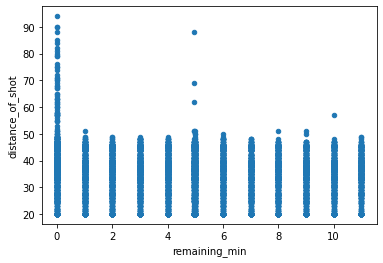

In [109]:
df.plot.scatter('remaining_min', 'distance_of_shot')
plt.show()

The distance of shot is more in 0th remaining_min.

# Conclusion

1. The unnecessary columns have been deleted.
2. Few of the column null values have been addressed.